## Abundances driven by Boolean network states

2024-2025

Alan M H Beem

##### This file demonstrates functionality of AbundantBooleanNetwork class, where abundances are modeled akin to Euler's method

#### Abundances model:
int(bool) -> {0, 1}

Abundant node update: abundance(t + 1) = abundance(t) * degradation_rate + transcription_rate * int(state)

Nested abundant node update: Given a current state, choose a matching entry in output column, take the states of the corresponding input row to be the current states of the nested nodes Abundant nodes, compute abundances for each (I'm not sure what these would represent, but I wanted to see what it looked like)

In [1]:
# setup
from abn_mir_plotting_functions import *
from abn_mir_helper_functions import *


net_selection = select_network(20, 12, 25, 20, 35, 2000)  # -> [BooleanNetwork, list[BooleanNetwork], a_bn_index_of_maximum_length_cycle: int]  # maximum longest cycle length 45 can make for longer runtimes re perturbation transition matrix
for more_cycles in range(1000):
    net_selection[0].add_cycle_without_resample()
abun_bn_app_2 = AbundantBooleanNetwork(1, [1], 2, 400, 0)  # these values are replaced
abun_bn_app_2.from_boolean_network(net_selection[0])  # with construction from net_selection
abun_bn_app_2.add_abundant_nodes(15)
abun_bn_app_2.add_nested_nodes(5, 4, False, 64)
abun_bn_cycle_lengths = abun_bn_app_2.get_avg_cycle_length()
for each_node in abun_bn_app_2.get_all_abundant_nodes():
    each_node.random_setup(int(np.average(abun_bn_cycle_lengths)))
abundance_colors = get_colors(len(net_selection[0]), False)
bv_colors = get_colors(len(net_selection[0].bn_collapsed_cycles) + 10, True)
align_cycle_states_lists_of_cc_to_cons_seq(net_selection[0].bn_collapsed_cycles)
print(f"Calculated {len(net_selection[1])} networks.\nSelected network:\n{net_selection[0]}")

Calculated 294 networks.
Selected network:
BooleanNetwork: N=20. avg_k= 1.65. Run-ins: 1202. Observed cycles: 24. t_records: 1202. u_records: 0
Cycle lengths: [12, 12, 12, 12, 6, 6, 6, 6, 6, 6, 4, 4, 4, 4, 4, 4, 2, 2, 2, 2, 2, 2, 2, 2]


#### Abundances over a transition from perturbation records

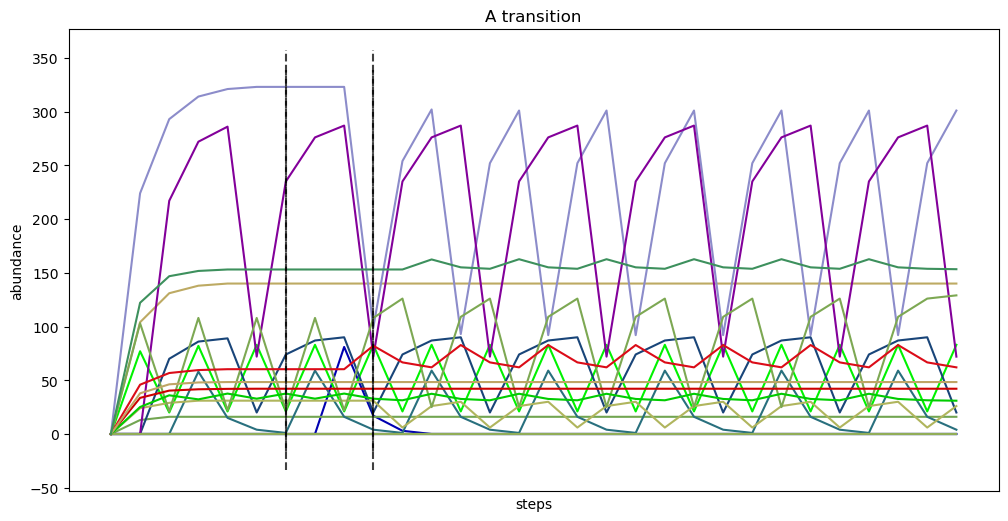

In [2]:
#### Abundances over a transition from perturbation records
abun_bn_app_2.compute_unit_perturbations_matrix(0, False)
shuffled_index_list = list(range(len(abun_bn_app_2.cycles_unit_perturbations_records)))
shuffle(shuffled_index_list)
for i in shuffled_index_list:
    record = abun_bn_app_2.cycles_unit_perturbations_records[i]
    if record.start_index != record.end_index and len(abun_bn_app_2.bn_collapsed_cycles.cycle_records[record.start_index]) != len(abun_bn_app_2.bn_collapsed_cycles.cycle_records[record.end_index]):
        to_show = (start_cycle:=abun_bn_app_2.bn_collapsed_cycles.cycle_records[record.start_index].cycle_states_list[1:])  # then through index of ref state - 1
        to_show.extend(start_cycle[:start_cycle.index(record.reference_state)])
        v1 = len(to_show) - 1  # last index of starting cycle
        to_show.extend(record.run_in)
        v2 = len(to_show) - 1  # first index of ending cycle
        end_cycle = abun_bn_app_2.bn_collapsed_cycles.cycle_records[record.end_index].cycle_states_list[1:]
        to_show.extend(end_cycle[end_cycle.index(record.run_in[-1]) + 1:])
        to_show.extend(end_cycle)
        abun_bn_app_2.animate_boolean_states_list(to_show, 1, True)
        break
plot_abundances(abun_bn_app_2.current_abundances_list, "A transition", bv_colors, True, [v1, v2], None, None, [12, 6], [])

#### Additional outputs of abundances as a function of Boolean states

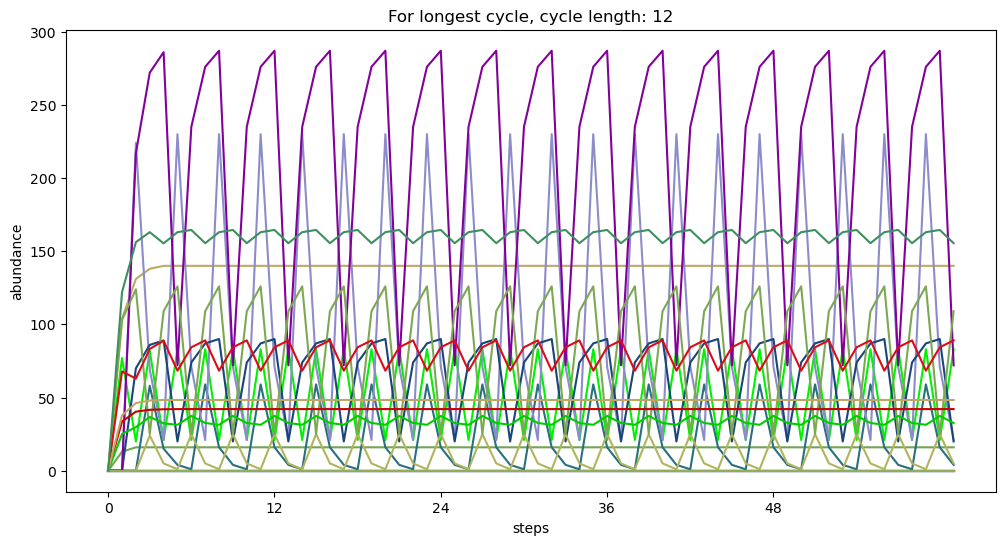

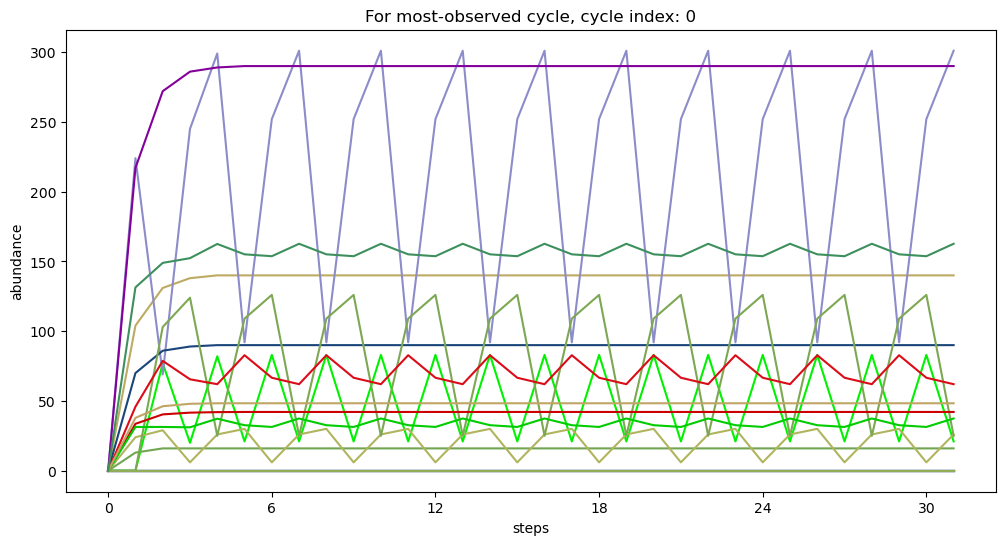

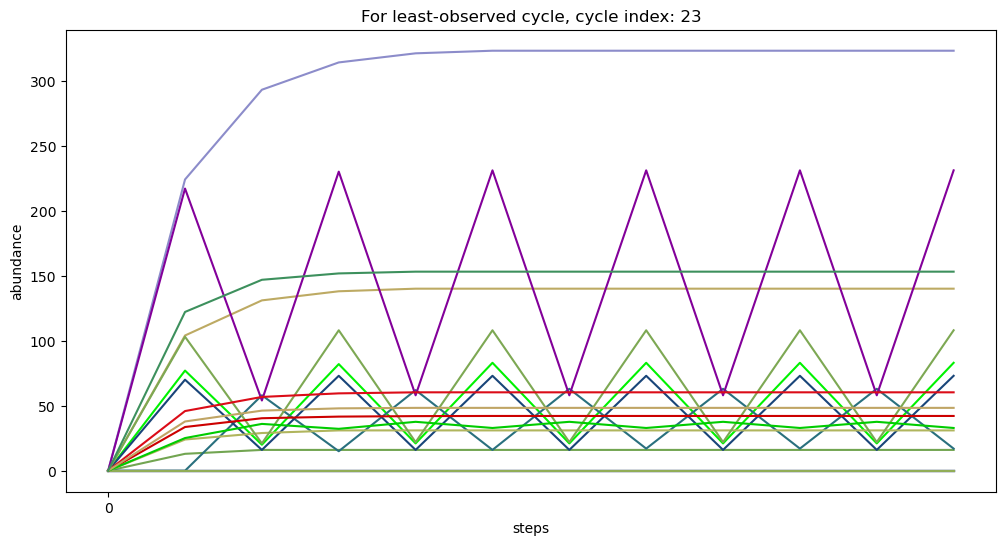

In [3]:

abun_bn_app_2.bn_collapsed_cycles.sort_cycle_records_by_cycle_length()
abun_bn_app_2.animate_boolean_states_list(abun_bn_app_2.bn_collapsed_cycles.cycle_records[0], 5, True)
cycle_length = abun_bn_app_2.longest_cycle_length()
plot_abundances(abun_bn_app_2.current_abundances_list, "For longest cycle, cycle length: " + str(cycle_length), bv_colors, True, [], None, None, [12, 6], [cycle_length * c_i for c_i in range(int(len(abun_bn_app_2.current_abundances_list) / cycle_length))])
abun_bn_app_2.bn_collapsed_cycles.sort_cycle_records_by_num_observations()
abun_bn_app_2.animate_boolean_states_list(abun_bn_app_2.bn_collapsed_cycles.cycle_records[0], 5, True)
cycle_length = len(abun_bn_app_2.bn_collapsed_cycles.cycle_records[0])
plot_abundances(abun_bn_app_2.current_abundances_list, "For most-observed cycle, cycle index: 0", bv_colors, True, [], None, None, [12, 6], [cycle_length * c_i for c_i in range(int(len(abun_bn_app_2.current_abundances_list) / cycle_length) + 1)])
abun_bn_app_2.animate_boolean_states_list(abun_bn_app_2.bn_collapsed_cycles.cycle_records[-1], 5, True)
plot_abundances(abun_bn_app_2.current_abundances_list, "For least-observed cycle, cycle index: " + str(len(abun_bn_app_2.bn_collapsed_cycles) - 1), bv_colors, True, [], None, None, [12, 6], [cycle_length * c_i for c_i in range(int(len(abun_bn_app_2.current_abundances_list) / cycle_length))])

With different parameters for averaging nested node behavior

AbundantNodes with pseudorandom rates, assigned pseudorandomly to Boolean function nodes, for 3 cycles


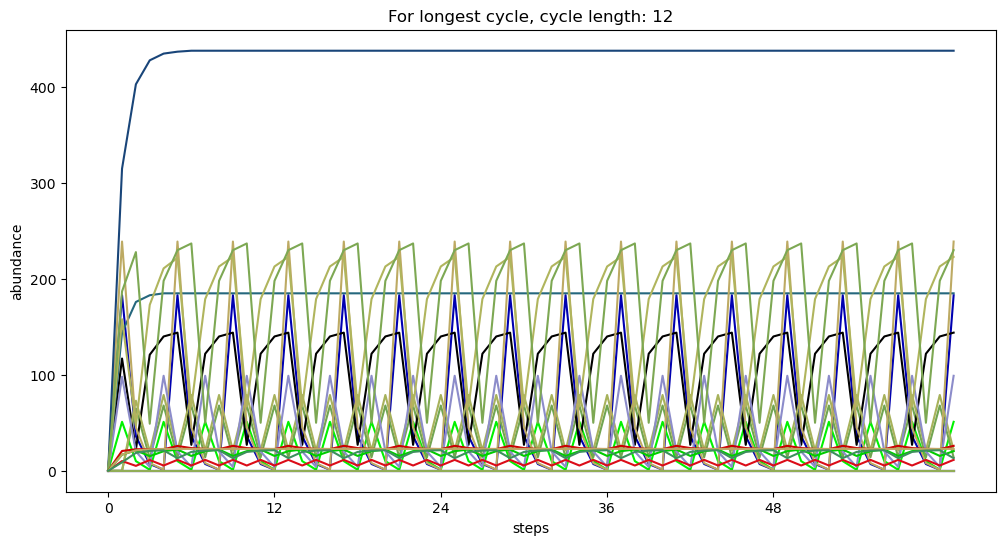

In [4]:
abun_bn_app_2 = AbundantBooleanNetwork(1, [1], 2, 400, 0)  # these values are replaced
abun_bn_app_2.from_boolean_network(net_selection[0])  # with copy from net_selection
abun_bn_app_2.add_abundant_nodes(15)
abun_bn_app_2.add_nested_nodes(5, 11, False, 3)
abun_bn_cycle_lengths = abun_bn_app_2.get_avg_cycle_length()
for each_node in abun_bn_app_2.get_all_abundant_nodes():
    each_node.random_setup(int(np.average(abun_bn_cycle_lengths)))
print("AbundantNodes with pseudorandom rates, assigned pseudorandomly to Boolean function nodes, for 3 cycles")
abun_bn_app_2.bn_collapsed_cycles.sort_cycle_records_by_cycle_length()
abun_bn_app_2.animate_boolean_states_list(abun_bn_app_2.bn_collapsed_cycles.cycle_records[0], 5, True)
cycle_length = abun_bn_app_2.longest_cycle_length()
plot_abundances(abun_bn_app_2.current_abundances_list, "For longest cycle, cycle length: " + str(cycle_length), bv_colors, True, [], None, None, [12, 6], [cycle_length * c_i for c_i in range(int(len(abun_bn_app_2.current_abundances_list) / cycle_length))])
# abun_bn_app_2.bn_collapsed_cycles.sort_cycle_records_by_num_observations()
# abun_bn_app_2.animate_boolean_states_list(abun_bn_app_2.bn_collapsed_cycles.cycle_records[0], 5, True)
# cycle_length = len(abun_bn_app_2.bn_collapsed_cycles.cycle_records[0])
# plot_abundances(abun_bn_app_2.current_abundances_list, "For most-observed cycle, cycle index: 0", bv_colors, True, [], None, None, [12, 6], [cycle_length * c_i for c_i in range(int(len(abun_bn_app_2.current_abundances_list) / cycle_length) + 1)])
# abun_bn_app_2.animate_boolean_states_list(abun_bn_app_2.bn_collapsed_cycles.cycle_records[-1], 5, True)
# plot_abundances(abun_bn_app_2.current_abundances_list, "For least-observed cycle, cycle index: " + str(len(abun_bn_app_2.bn_collapsed_cycles) - 1), bv_colors, True, [], None, None, [12, 6], [cycle_length * c_i for c_i in range(int(len(abun_bn_app_2.current_abundances_list) / cycle_length))])

With pseudorandom nested nodes behavior

AbundantNodes with pseudorandom rates, assigned pseudorandomly to Boolean function nodes, for 3 cycles


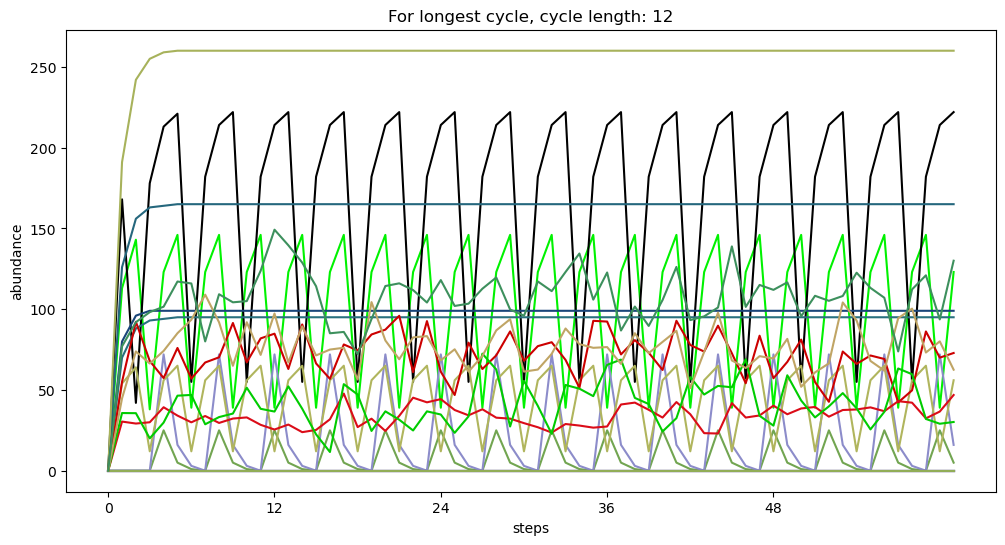

In [5]:
abun_bn_app_2 = AbundantBooleanNetwork(1, [1], 2, 400, 0)  # these values are replaced
abun_bn_app_2.from_boolean_network(net_selection[0])  # with copy from net_selection
abun_bn_app_2.add_abundant_nodes(15)
abun_bn_app_2.add_nested_nodes(5, 4, True, SystemRandom().randint(3,11))
abun_bn_cycle_lengths = abun_bn_app_2.get_avg_cycle_length()
for each_node in abun_bn_app_2.get_all_abundant_nodes():
    each_node.random_setup(int(np.average(abun_bn_cycle_lengths)))
print("AbundantNodes with pseudorandom rates, assigned pseudorandomly to Boolean function nodes, for 3 cycles")
abun_bn_app_2.bn_collapsed_cycles.sort_cycle_records_by_cycle_length()
abun_bn_app_2.animate_boolean_states_list(abun_bn_app_2.bn_collapsed_cycles.cycle_records[0], 5, True)
cycle_length = abun_bn_app_2.longest_cycle_length()
plot_abundances(abun_bn_app_2.current_abundances_list, "For longest cycle, cycle length: " + str(cycle_length), bv_colors, True, [], None, None, [12, 6], [cycle_length * c_i for c_i in range(int(len(abun_bn_app_2.current_abundances_list) / cycle_length))])
# abun_bn_app_2.bn_collapsed_cycles.sort_cycle_records_by_num_observations()
# abun_bn_app_2.animate_boolean_states_list(abun_bn_app_2.bn_collapsed_cycles.cycle_records[0], 5, True)
# cycle_length = len(abun_bn_app_2.bn_collapsed_cycles.cycle_records[0])
# plot_abundances(abun_bn_app_2.current_abundances_list, "For most-observed cycle, cycle index: 0", bv_colors, True, [], None, None, [12, 6], [cycle_length * c_i for c_i in range(int(len(abun_bn_app_2.current_abundances_list) / cycle_length) + 1)])
# abun_bn_app_2.animate_boolean_states_list(abun_bn_app_2.bn_collapsed_cycles.cycle_records[-1], 5, True)
# plot_abundances(abun_bn_app_2.current_abundances_list, "For least-observed cycle, cycle index: " + str(len(abun_bn_app_2.bn_collapsed_cycles) - 1), bv_colors, True, [], None, None, [12, 6], [cycle_length * c_i for c_i in range(int(len(abun_bn_app_2.current_abundances_list) / cycle_length))])